In [1]:
from model import vonmises180_sample, OrientationWei, vonmises180
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import simpson

In [2]:
model = OrientationWei()

In [3]:
theta0 = 0.6*np.pi
sigma_rep = 0.1
norm=True

m = model.stim2rep(theta0)

theta_rep = model.rep_grid

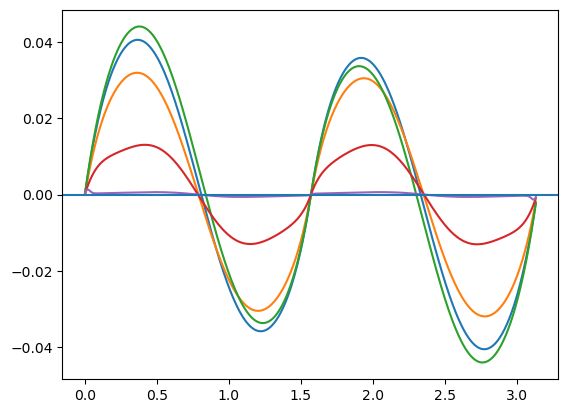

In [4]:
theta0 = np.pi

m = model.stim2rep(theta0)

# plt.plot(model.stim_grid_, model.subject_estimate_theta(model.rep_grid).squeeze())
# plt.plot(model.stim_grid_[:-1], model.subject_estimate_theta(model.rep_grid[:-1], sigma_rep=.8).squeeze() - model.stim_grid_[:-1])
plt.plot(model.stim_grid_[:-1], model.subject_estimate_theta(model.rep_grid[:-1], sigma_rep=.2).squeeze() - model.stim_grid_[:-1])
plt.plot(model.stim_grid_[:-1], model.subject_estimate_theta(model.rep_grid[:-1], sigma_rep=.1).squeeze() - model.stim_grid_[:-1])
plt.plot(model.stim_grid_[:-1], model.subject_estimate_theta(model.rep_grid[:-1], sigma_rep=.3).squeeze() - model.stim_grid_[:-1])
plt.plot(model.stim_grid_[:-1], model.subject_estimate_theta(model.rep_grid[:-1], sigma_rep=.05).squeeze() - model.stim_grid_[:-1])
plt.plot(model.stim_grid_[:-1], model.subject_estimate_theta(model.rep_grid[:-1], sigma_rep=.01).squeeze() - model.stim_grid_[:-1])

# plt.plot(model.stim_grid_[:-1], model.subject_estimate_theta(model.rep_grid[:-1], sigma_rep=.0001).squeeze() - model.stim_grid_[:-1])
# plt.plot(model.stim_grid_[:-1], model.subject_estimate_theta(model.rep_grid[:-1], sigma_rep=1e-9).squeeze() - model.stim_grid_[:-1])
plt.axhline(.0)

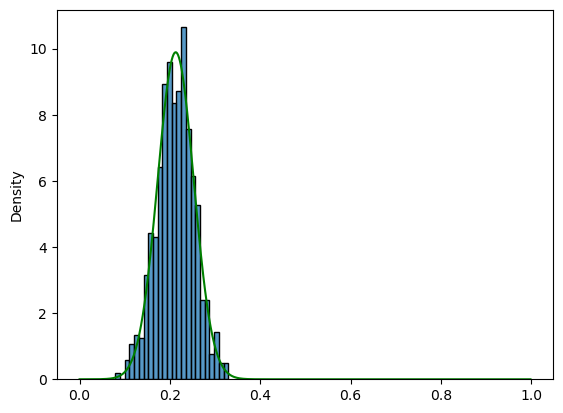

In [14]:
theta0 = .2 * np.pi
theta0_ = model.stim2rep(theta0)
sigma_rep = 0.04

samples_rep = vonmises180_sample(theta0_, sigma_rep, 1000)

sns.histplot(samples_rep, stat='density')

plt.plot(model.rep_grid, np.squeeze(model.rep_likelihood(theta0_, model.rep_grid, sigma_rep, norm=True)), c='green')

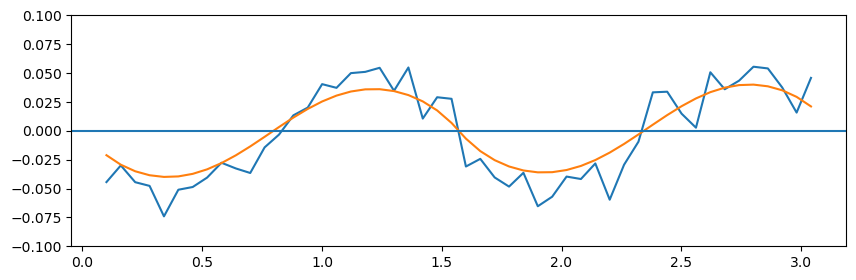

In [9]:
from numpy import mean


sigma_rep = .1
theta0 = np.linspace(.1, np.pi-0.1, 50)
theta0_ = model.stim2rep(theta0)

samples_m = [vonmises180_sample(t0_, sigma_rep, 1000) for t0_ in theta0_]
# estimates = [model.subject_estimate_theta(m) for m in samples_m]

estimates = model.subject_estimate_theta(np.array(samples_m)[:, :, np.newaxis])
mean_simulated_estimates = [np.angle(np.mean(np.exp(1j*(est*2)))) % (np.pi*2.) /2. for est in estimates]

plt.plot(theta0, theta0 - mean_simulated_estimates)

theta0_est = model.model_estimate_theta(theta0, sigma_rep).squeeze()
plt.plot(theta0, theta0 - theta0_est)

plt.ylim(-.1, .1)

plt.gcf().set_size_inches(10,3)
plt.axhline(0.0)

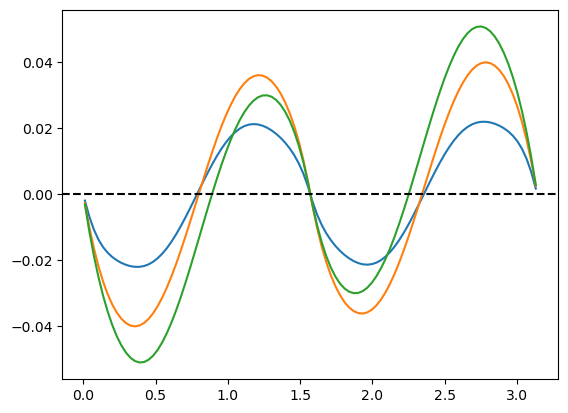

In [7]:
theta0 = np.linspace(.01, np.pi-0.01, 100)

for sigma_rep in [0.05, 0.1, 0.2]:
    theta0_est = model.model_estimate_theta(theta0, sigma_rep).squeeze()
    plt.plot(theta0, theta0 - theta0_est)

plt.axhline(0., c='k', ls='--')

0.9992836486592916
0.9992777522579008


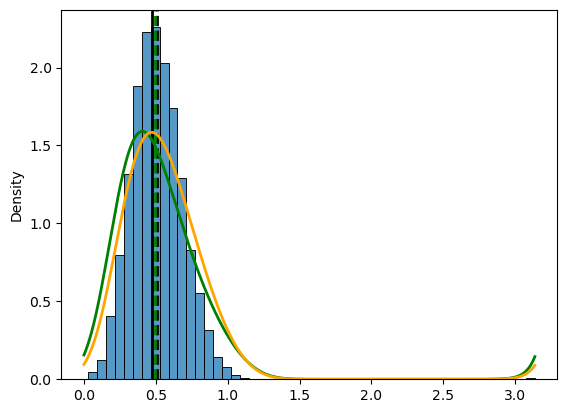

In [8]:
theta0 = .15*np.pi
theta0_ = model.stim2rep(theta0)

sigma_rep = .05

samples_m = vonmises180_sample(theta0_, sigma_rep, 10000)

estimates = model.subject_estimate_theta(np.array(samples_m))
mean_estimate = np.angle(np.mean(np.exp(1j*(estimates*2)))) % (np.pi*2.) /2.

mean_estimate_model = model.model_estimate_theta(theta0, sigma_rep=sigma_rep)

sns.histplot(estimates.squeeze(), stat='density', bins=50)
plt.axvline(mean_estimate, c='k', ls='--', lw=2)
plt.axvline(theta0, c='k', lw=2)
plt.axvline(mean_estimate_model, ls='--', lw=2, c='green')

ll = model.model_likelihood(theta0, sigma_rep=sigma_rep).squeeze()
print(simpson(ll, model.rep_grid))
x, ll = model.rep2stim(model.rep_grid, ll)
print(simpson(ll, x))

# ll_ = ll / model.prior(x)
# ll_ /= simpson(ll_, x)
plt.plot(x, ll, c='green', lw=2)
# plt.axvline(mean_estimate, c='r')

post = ll/model.prior(x)
post /= simpson(post, x)
plt.plot(x, post, c='orange', lw=2)